In this assignment, we are going to apply numerical method to solve the eigenvalue of One Dimensional Schrodinger Equation. 

One Dimensional Schrodinger Equation : 

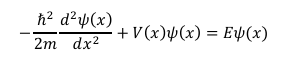

also can rewrite in form of 

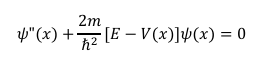

The Schrodinger equation can be solved with these eigenvalues:

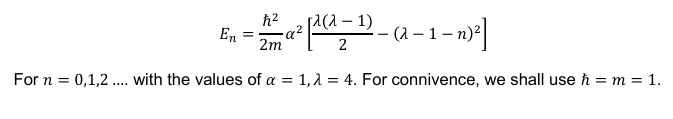

Let's start the code by insert all the libraries and parameters given

In [37]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.0  # Planck's constant
alpha = 1.0
lam = 4 # λ parameter for the potential
m = 1.0     # Mass of the particle
dx = 0.01   # Step size
x_max = 5.0 # Boundary for x
x = np.arange(-x_max, x_max + dx, dx)  # Spatial gridatial grid

Define the Potential well, follow by this equation

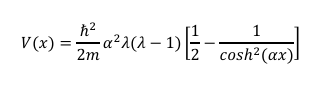

In [41]:
# Define the potential
def potential(x):
    return (hbar**2 / (2 * m)) * alpha**2 * lam * (lam - 1) * (1 / 2 - 1 / np.cosh(alpha * x)**2)

V = potential(x)  # Compute potential over spatial domain

Find the eigenvalue by use Numerov Method 

Numerov Method is numerical technique that used to solve second-order differential equations where 1D Schrodinger Equation frequently encountered. It is effiecient because can achive high accuracy.

In [45]:
# Numerov algorithm
def numerov(E, x, V):
    psi = np.zeros_like(x)  # Initialize wavefunction
    dx2 = dx**2             # Square of step size
    k = 2 * m * (E - V) / hbar**2  # Effective potential term
    
    # Initial conditions
    psi[0] = 0.0           # Wavefunction at the left boundary
    psi[1] = 1e-5          # Small nonzero value to start the integration
    
    for i in range(1, len(x) - 1):
        psi[i + 1] = (2 * (1 - 5/12 * dx2 * k[i]) * psi[i] - (1 + 1/12 * dx2 * k[i-1]) * psi[i-1]) / (1 + 1/12 * dx2 * k[i+1])
    
    return psi

In [47]:
# Shooting method: check if boundary conditions are satisfied
def boundary_condition(E):
    psi = numerov(E, x, V)  # Solve for given energy E
    return psi[-1]          # Return value of wavefunction at the right boundary

# Manual bisection method to find roots (eigenvalues)
def bisection_method(f, E_min, E_max, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        E_mid = (E_min + E_max) / 2.0
        f_min = f(E_min)
        f_mid = f(E_mid)

        # Check for convergence
        if abs(f_mid) < tol or abs(E_max - E_min) < tol:
            return E_mid
        
        # Update bounds
        if f_min * f_mid < 0:
            E_max = E_mid
        else:
            E_min = E_mid
    
    raise ValueError("Bisection method did not converge.")

# Find eigenvalues
def find_eigenvalues(E_range, tol=1e-6):
    eigenvalues = []
    for i in range(len(E_range) - 1):
        if boundary_condition(E_range[i]) * boundary_condition(E_range[i+1]) < 0:
            E_root = bisection_method(boundary_condition, E_range[i], E_range[i+1], tol=tol)
            eigenvalues.append(E_root)
    return eigenvalues

# Energy range
E_range = np.linspace(-3,3,1000)  # Reasonable range for harmonic oscillator

# Find eigenvalues
eigenvalues = find_eigenvalues(E_range)
print("Eigenvalues (Energy levels):", eigenvalues)

Eigenvalues (Energy levels): [-1.500000366577515, 1.000000366577515, 2.501093867304805]


From above, the relationship
1) boundary_condition(E)defines a function whose root corresponds to the energy eigenvalue that satisfies the boundary condition (means the wavefunction is zero at boundary)
2) The bisection_method is used to find the root of this function by iteratively narrowing the interval [E_min, E_max] in which the function changes sign.

Let me explain more, 
1) Shooting Method : boundary_condition(E) func perform shooting method. It solves the Schrodinger equation (by numerov method) for given E and checks the wavefunction satiesfies the boundary condition at right boundary (psi[-1])
2) bisection_method use output of boundary_condition to perform root finding. It searches for the value of E where boundary_condition(E) is zero, indicating the energy eigenvalue that corresponds to a valid solution where the wavefunction satisfies the boundary conditions

so the Eigenvalue that I get as shown above are E=-1.50, E=1.00 and E=2.50 (I take 2 decimal places) 

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\User\AppData\Local\Temp\ipykernel_11364\887892900.py:12: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\psi(x)$ & $V(x)$")


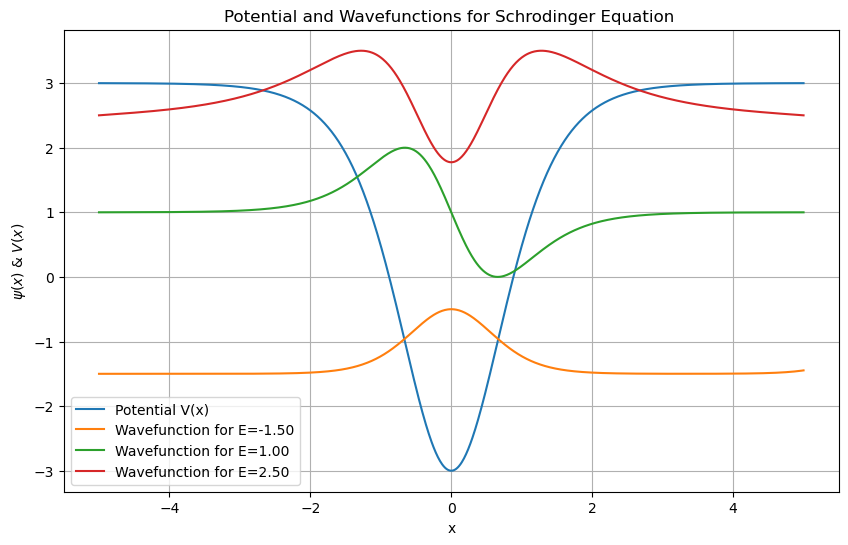

In [49]:
# Plot potential and wavefunctions
plt.figure(figsize=(10, 6))
plt.plot(x, V, label="Potential V(x)")

for i, E in enumerate(eigenvalues[:3]):  # Plot first 3 eigenfunctions
    psi = numerov(E, x, V)
    psi_norm = psi / np.max(np.abs(psi))  # Normalize the wavefunction
    plt.plot(x, psi_norm + E, label=f"Wavefunction for E={E:.2f}")

plt.title("Potential and Wavefunctions for Schrodinger Equation ")
plt.xlabel("x")
plt.ylabel("$\psi(x)$ & $V(x)$")
plt.legend()
plt.grid()
plt.show()

For the first three eigenvalue in eigenvalues[:3], Numerov method (numerov) used to calculate the wavefunction for each energy E. The wavefunction is normalized by dividing by its max absolute value, so the amplitude is comparable and visually clear on the plot.